### Data processing

In [1]:
folder = 'D:/DS/lturnlight'

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import matplotlib.pyplot as plt
import cv2
lturn = []
for filename in os.listdir(folder):
  imgg = plt.imread(os.path.join(folder,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  lturn.append(resized_img)

In [4]:
folder1  = 'D:/DS/rturnlight'

In [5]:
rturn = []
for filename in os.listdir(folder1):
  imgg = plt.imread(os.path.join(folder1,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  rturn.append(resized_img)

In [6]:
folder2 = 'D:/DS/brlights'

In [7]:
brlights = []
for filename in os.listdir(folder2):
  imgg = plt.imread(os.path.join(folder2,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  brlights.append(resized_img)

In [8]:
import numpy as np
np.shape(lturn)

(10, 64, 64)

In [9]:
np.shape(rturn)

(12, 64, 64)

In [10]:
np.shape(brlights)

(19, 64, 64)

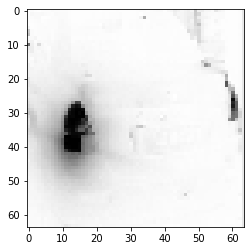

In [14]:
plt.imshow(lturn[7] , cmap = 'binary')

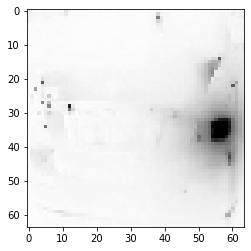

In [19]:
plt.imshow(rturn[10],cmap = 'binary')

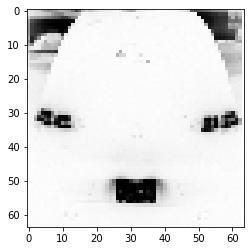

In [26]:
plt.imshow(brlights[4],cmap='binary')

In [27]:
lturn = np.array(lturn)
rturn = np.array(rturn)
brlights = np.array(brlights)

In [28]:
X1 = lturn.reshape(-1 , 64*64)
X2 = rturn.reshape(-1 , 64*64)
X3 = brlights.reshape(-1 , 64*64)

In [29]:
X1.shape , X2.shape ,X3.shape

((10, 4096), (12, 4096), (19, 4096))

In [30]:
X = np.concatenate([X1,X2,X3])

In [31]:
X.shape

(41, 4096)

In [32]:
y1 = np.zeros(10)
y2 = np.ones(12)
y3 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])
y = np.concatenate([y1 , y2 , y3])
y = y.reshape(-1 , 1 )

In [33]:
y.shape

(41, 1)

### importing PCA for feature reduction

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20,svd_solver='full')
pca.fit(X)

PCA(n_components=20, svd_solver='full')

In [35]:
print(sum(pca.explained_variance_ratio_))

0.9221676123033142


In [36]:
X = pca.fit_transform(X)

In [37]:
X.shape

(41, 20)

### Using ANN to predict the accuracy of this model

In [38]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten


In [39]:
y = tf.keras.utils.to_categorical(
    y, dtype='float32'
)

In [40]:
y.shape

(41, 3)

In [41]:
model = Sequential()
model.add(Dense(512 , activation = 'relu' , input_dim = 20,))
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(3 , activation = 'softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               10752     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 183,427
Trainable params: 183,427
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [44]:
model.fit(X , y , epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 59.3886 - accuracy: 0.4146
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 45.4735 - accuracy: 0.6341
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 17.5778 - accuracy: 0.7073
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 2.6348 - accuracy: 0.8537
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8680 - accuracy: 0.8049
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 5.0449 - accuracy: 0.9024
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 2.1706 - accuracy: 0.9024
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.9756
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9756
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9756
Epoch 11/100
2/2 [========

### Preprocessing Test Data

In [45]:
folder3 = 'D:/DS/lturntest'
folder4 = 'D:/DS/rturntest'
folder5 = 'D:/DS/brlightstest'


In [46]:
lttest = []
for filename in os.listdir(folder3):
  imgg = plt.imread(os.path.join(folder3,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  lttest.append(resized_img)

In [47]:
rttest = []
for filename in os.listdir(folder4):
  imgg = plt.imread(os.path.join(folder4,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  rttest.append(resized_img)

In [48]:
brtest = []
for filename in os.listdir(folder5):
  imgg = plt.imread(os.path.join(folder5,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (64,64))
  brtest.append(resized_img)

In [49]:
np.shape(brtest)

(9, 64, 64)

In [50]:
np.shape(rttest)

(9, 64, 64)

In [51]:
np.shape(lttest)

(12, 64, 64)

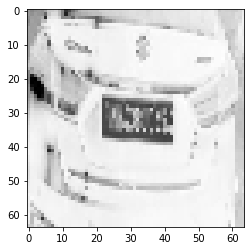

In [52]:
plt.imshow(lttest[7] , cmap = 'binary')

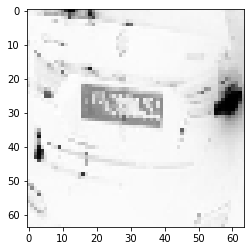

In [53]:
plt.imshow(rttest[5] , cmap = 'binary')

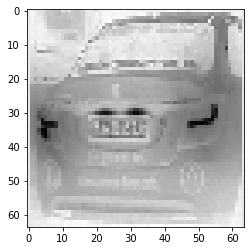

In [54]:
plt.imshow(brtest[5] , cmap = 'binary')

In [55]:
lttest = np.array(lttest)
rttest = np.array(rttest)
brtest = np.array(brtest)

In [56]:
lttest.shape , rttest.shape ,brtest.shape

((12, 64, 64), (9, 64, 64), (9, 64, 64))

In [57]:
X4 = lttest.reshape(-1, 64*64)
X5 = rttest.reshape(-1, 64*64)
X6 = brtest.reshape(-1, 64*64)

In [58]:
X_test = np.concatenate([X4,X5,X6])

In [59]:
X_test.shape

(30, 4096)

In [60]:
y1 = np.zeros(12)
y2 = np.ones(9)
y3 = np.array([2,2,2,2,2,2,2,2,2])
y = np.concatenate([y1 , y2 , y3])
y = y.reshape( -1 , 1 )

In [61]:
y.shape

(30, 1)

In [62]:
y = tf.keras.utils.to_categorical(
    y, dtype='float32'
)

In [63]:
y.shape

(30, 3)

In [64]:
X_test = pca.transform(X_test)

In [65]:
X_test.shape

(30, 20)

In [66]:
np.argmax(model.predict(X_test),axis=-1)

array([1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [67]:
s= np.argmax(model.predict(X_test),axis=-1)
s.shape
s=s.reshape(-1,1)

In [68]:
s.shape

(30, 1)

In [69]:
model.evaluate(X_test,y)

1/1 [==============================] - 0s 113ms/step - loss: 8.5547 - accuracy: 0.7333


[8.554730415344238, 0.7333333492279053]

In [70]:
image = plt.imread('img.jpeg') 

In [71]:
gray_image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image , (64,64))

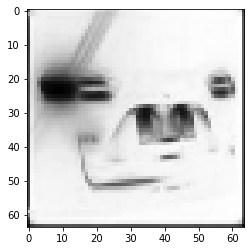

In [72]:
plt.imshow(resized_image,cmap='binary')

In [73]:
resized_image = resized_image.reshape(-1,64*64)

In [74]:
resized_image = pca.transform(resized_image)

In [75]:
resized_image.shape

(1, 20)

In [76]:
np.argmax(model.predict(resized_image),axis=-1)

array([2], dtype=int64)